Imports!

In [22]:
import h5py

from keras.optimizers import SGD
from keras.utils.visualize_util import to_graph

from IPython.display import SVG

from train import infer_sizes
from models import vggnet16_regressor_model

Now load up our data H5 and grab some trained weights for our model.

In [20]:
# Load data and get a model
train_h5 = h5py.File('../cache/train-patches-mpii/samples-000001.h5-repacked', 'r')
data = train_h5['data']
labels = train_h5['label']
input_shape, reg_outs, class_outs = infer_sizes('../cache/train-patches-mpii/samples-000001.h5-repacked')
sgd = SGD(lr=0.0001, nesterov=True, momentum=0.9)
model = vggnet16_regressor_model(input_shape, reg_outs, sgd, 'glorot_normal')
model.load_weights('../cache/keras-checkpoints/model-iter-384-r405629.h5')

Start by doing a basic visualisation of our model and inspecting the shape of our data.

# Data shapes
data:  (87360, 8, 224, 224)
label:  (87360, 6)
# Network


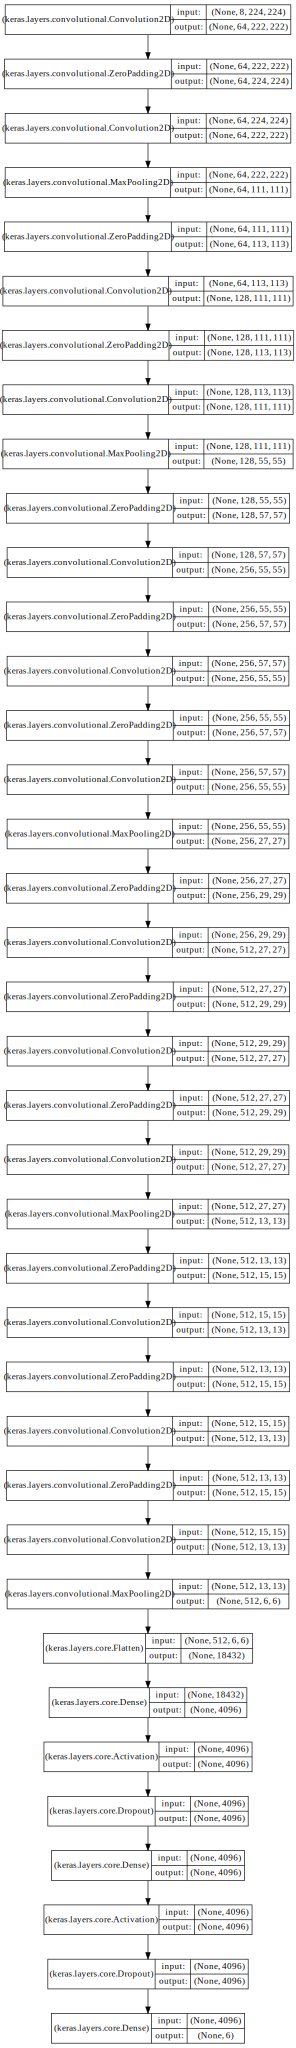

In [31]:
print('# Data shapes')
print 'data: ', data.shape
print 'label: ', labels.shape

print('# Network')
SVG(to_graph(model, show_shape=True).create(prog='dot', format='svg'))

Now write some functions to look at our data and also a few utilities for doing forward prop. These will be useful for inspecting activations and gradients, as well as verifying that I've written what I wanted to write to the file :)

In [36]:
def show_datum(datum):
    pass

show_datum(data[0])